In [15]:
import math
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [11]:
target = 0
current = 0
x = sp.symbols('x')
pos_seq = lambda x : 1 / (2*x + 1)
neg_seq = lambda x : -1 / (2*x)
pos_ind = 0
neg_ind = 1
rearrangement = []
while (pos_ind + neg_ind) <= 101:
  if current < target:
    current += pos_seq(pos_ind)
    rearrangement += [pos_seq(pos_ind)]
    pos_ind += 1
  else:
    current += neg_seq(neg_ind)
    rearrangement += [neg_seq(neg_ind)]
    neg_ind += 1
abs(current - target)

#at the end of this process we are at a distance of about 0.01475 from 0

0.021323814794215756

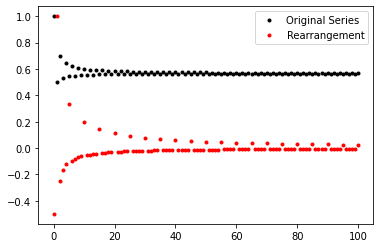

In [13]:
X = np.linspace(0,100,101)
A = []
sum = 0
for i in range(101):
  if i % 2 == 0:
    sum += pos_seq(i)
    A += [sum]
  elif i % 2 == 1:
    sum += neg_seq(i)
    A += [sum]
plt.plot(X,A, 'k.', label="Original Series")
plt.plot(X, rearrangement, 'r.', label="Rearrangement")
plt.legend()
plt.show()

In [14]:
def rearrange_sequence(A, target):
  N = len(A)
  a = 0
  b = 0
  end_current_value = 0
  rearranged_end_sequence = []
  while a < N and b < N:
    if end_current_value > target:
      if A[a] < 0:
        rearranged_end_sequence += [A[a]]
        end_current_value += A[a]
        a += 1
      else:
        a += 1
    else:
      if A[b] > 0:
        rearranged_end_sequence += [A[b]]
        end_current_value += A[b]
        b += 1
      else:
        b += 1
  return [end_current_value, rearranged_end_sequence]

In [16]:
def series_constructor(a):
  A = []
  sum = 0
  for i in range(len(a)):
    sum += a[i]
    A += [sum]
  return A
  #This functions inputs a sequence as a list and exports its corresponding series

In [18]:
x = sp.symbols('x')
b = lambda x : ((-1)**x * math.log10(x)) / x
B = []
for i in range(2, 102):
  B += [b(i)]
L0 = 0
L1 = 5
L2 = -5
L3 = -0.159869
r0 = rearrange_sequence(B, L0)[1]
r1 = rearrange_sequence(B, L1)[1]
r2 = rearrange_sequence(B, L2)[1]
r3 = rearrange_sequence(B, L3)[1]
R0 = series_constructor(r0)
R1 = series_constructor(r1)
R2 = series_constructor(r2)
R3 = series_constructor(r3)

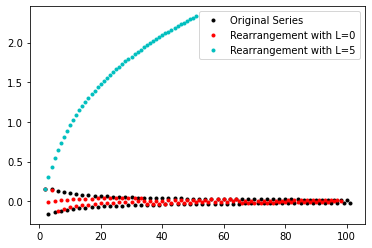

In [20]:
x = np.linspace(2, 101, 100)
x0 = np.linspace(2, len(R0) + 1, len(R0))
x1 = np.linspace(2, len(R1) + 1, len(R1))
plt.plot(x, B, 'k.', label="Original Series")
plt.plot(x0, R0, 'r.', label="Rearrangement with L=0")
plt.plot(x1, R1, 'c.', label="Rearrangement with L=5")
plt.legend()
plt.show()

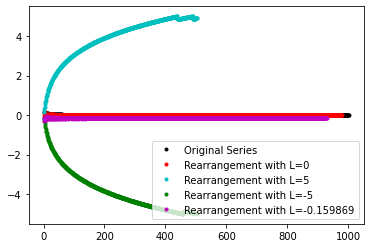

In [24]:
x = sp.symbols('x')
B = []
for i in range(2, 1002):
  B += [b(i)]
L0 = 0
L1 = 5
L2 = -5
L3 = -0.159869
r0 = rearrange_sequence(B, L0)[1]
r1 = rearrange_sequence(B, L1)[1]
r2 = rearrange_sequence(B, L2)[1]
r3 = rearrange_sequence(B, L3)[1]
R0 = series_constructor(r0)
R1 = series_constructor(r1)
R2 = series_constructor(r2)
R3 = series_constructor(r3)
x = np.linspace(2, 1001, 1000)
x0 = np.linspace(2, len(R0) + 1, len(R0))
x1 = np.linspace(2, len(R1) + 1, len(R1))
x2 = np.linspace(2, len(R2) + 1, len(R2))
x3 = np.linspace(2, len(R3) + 1, len(R3))
plt.plot(x, B, 'k.', label="Original Series")
plt.plot(x0, R0, 'r.', label="Rearrangement with L=0")
plt.plot(x1, R1, 'c.', label="Rearrangement with L=5")
plt.plot(x2, R2, 'g.', label="Rearrangement with L=-5")
plt.plot(x3, R3, 'm.', label="Rearrangement with L=-0.159869")
plt.legend()
plt.show()

#We can see that the more terms we allow ourselves to use
#Directly correlates with how close we can get to our target value

In [29]:
def rearrangement_accuracy(A, target):
  N = len(A)
  a = 0
  b = 0
  end_current_value = 0
  while a < N and b < N:
    if end_current_value > target:
      if A[a] < 0:
        end_current_value += A[a]
        a += 1
      else:
        a += 1
    else:
      if A[b] > 0:
        end_current_value += A[b]
        b += 1
      else:
        b += 1
  return abs(target - end_current_value)

In [75]:
#The term number limit I am using is the 
#Maximum number of terms my computer can generate in 0s of runtime
#This happens to be 1000000
#The degree of Error I am using is 1
#Meaning the maximum limit we can "successfully" reach
#Is the largest L such that we can get within 0.1 of L
#using a rearragement of the first 1000000 terms of our sequence
#I will also test the largest negative
#And I will see how close we can get to 0
#To conserve time I will not be plotting these
#Furthermore I will be using a new function that does not construct
#Or return the sequence, instead only returning the end_current_value
x = sp.symbols('x')
B = []
for i in range(2, 1000002):
  B += [b(i)]
Lmax = 21 + (47/64)
L0 = 0
Lmin = -21 - (43/64)
x = np.linspace(2, 10000001, 10000000)
MaxAcc = rearrangement_accuracy(B, Lmax)
OAcc = rearrangement_accuracy(B, L0)
MinAcc = rearrangement_accuracy(B, Lmin)
print(MaxAcc)
print(OAcc)
print(MinAcc)
#Even with my optimizations, these are the largest positive and negative numbers
#My computer can get within 1 of within the first 1000000 terms of our sequence

0.9922028316371083
1.0566906109965283e-06
0.9991300143647166
